In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Epileptic_Seizure_Recognition.csv')
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [24]:
df['y'] = (df['y'] ==1).astype('int')
df['y']

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64

In [25]:
df['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [26]:
class_names = ['Non-epileptic', 'Epileptic']

In [27]:
df1 = df[df['y'] == 1]
df0 = df[df['y'] == 0]

In [28]:
print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

# Upsampling 

df1 = df1.sample(len(df0), replace = True)    # replace = True enables resampling

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

Number of samples in:
Class label 0 -  9200
Class label 1 -  2300

After resampling - 
Number of samples in:
Class label 0 -  9200
Class label 1 -  9200


In [29]:
df = df0.append(df1)

print('Total number of samples - ', len(df))

Total number of samples -  18400


<ipython-input-29-ae545ddb934d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df0.append(df1)


In [30]:
input_columns = list(df.columns[1:-1])    # exculding the first 'Unnamed' column
output_columns = list(df.columns[-1])

print("Number of input columns: ", len(input_columns))
#print("Input columns: ", ', '.join(input_columns))

print("Number of output columns: ", len(output_columns))
#print("Output columns: ", ', '.join(output_columns))

Number of input columns:  178
Number of output columns:  1


In [31]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(df, test_size = 0.2)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df))

Number of samples in...
Training set:  14720
Validation set:  1840
Testing set:  1840


In [32]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

Xtest, ytest = np.array(test_df[input_columns]), np.array(test_df[output_columns])

In [33]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,...,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000
mean,-16.129891,-13.926522,-11.532826,-8.359728,-5.199565,-2.161848,-0.503152,-0.887011,-0.874511,-0.030815,...,-10.565109,-14.969457,-19.161141,-21.334457,-20.347446,-18.848750,-17.442663,-16.507554,-16.677228,0.500000
std,244.851161,246.362374,242.550774,238.923885,239.316692,239.325632,238.750247,240.240863,242.008906,240.808043,...,246.494656,250.559283,257.193617,257.889117,254.520256,248.418632,245.681133,244.661045,247.570956,0.500014
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-84.000000,-83.000000,-82.000000,-81.250000,-81.000000,-76.000000,-75.000000,-73.000000,-74.000000,-73.000000,...,-82.000000,-82.000000,-84.000000,-88.000000,-88.000000,-86.000000,-87.000000,-83.000000,-85.000000,0.000000
50%,-10.000000,-9.000000,-8.000000,-8.000000,-9.000000,-8.000000,-7.000000,-7.000000,-5.000000,-5.000000,...,-10.000000,-11.000000,-12.000000,-12.000000,-12.000000,-11.000000,-10.000000,-11.000000,-11.000000,0.500000
75%,56.000000,56.000000,58.000000,60.000000,62.000000,64.000000,62.000000,64.000000,66.000000,65.250000,...,59.000000,57.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,54.000000,1.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [34]:
# Using standard scaler to standardize them to values with mean = 0 and variance = 1.

standard_scaler = StandardScaler()

# Fit on training set alone
Xtrain = standard_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xval = standard_scaler.transform(Xval)
Xtest = standard_scaler.transform(Xtest)

In [35]:
model = Sequential([
    Dense(512, activation = 'relu', input_shape = Xtrain[0].shape),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

cb = [EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)]
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               91648     
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,001
Trainable params: 256,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs=16, callbacks = cb)

Epoch 1/16
460/460 [==============================] - 5s 9ms/step - loss: 0.1860 - accuracy: 0.9362 - val_loss: 0.1481 - val_accuracy: 0.9598
Epoch 2/16
460/460 [==============================] - 5s 10ms/step - loss: 0.1010 - accuracy: 0.9682 - val_loss: 0.1218 - val_accuracy: 0.9679
Epoch 3/16
460/460 [==============================] - 3s 7ms/step - loss: 0.0877 - accuracy: 0.9700 - val_loss: 0.0933 - val_accuracy: 0.9701
Epoch 4/16
460/460 [==============================] - 4s 9ms/step - loss: 0.0923 - accuracy: 0.9694 - val_loss: 0.0943 - val_accuracy: 0.9696
Epoch 5/16
460/460 [==============================] - 3s 7ms/step - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.0896 - val_accuracy: 0.9755
Epoch 6/16
460/460 [==============================] - 3s 7ms/step - loss: 0.0796 - accuracy: 0.9740 - val_loss: 0.0864 - val_accuracy: 0.9766
Epoch 7/16
460/460 [==============================] - 4s 8ms/step - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.1251 - val_accuracy: 0.9712
Epoch

In [37]:
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs=16, callbacks = cb)

Epoch 1/16
460/460 [==============================] - 4s 7ms/step - loss: 0.0235 - accuracy: 0.9918 - val_loss: 0.0899 - val_accuracy: 0.9826
Epoch 2/16
460/460 [==============================] - 3s 7ms/step - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.0813 - val_accuracy: 0.9864
Epoch 3/16
460/460 [==============================] - 4s 8ms/step - loss: 0.0128 - accuracy: 0.9953 - val_loss: 0.0936 - val_accuracy: 0.9870
Epoch 4/16
460/460 [==============================] - 4s 10ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.1096 - val_accuracy: 0.9853
Epoch 5/16
460/460 [==============================] - 4s 8ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.1366 - val_accuracy: 0.9864


In [38]:
model.evaluate(Xtest, ytest)

58/58 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9870


[0.07193342596292496, 0.9869565367698669]

In [39]:
def plot(history1, history2, variable1, variable2):
    # combining metrics from both trainings    
    var1_history = history1[variable1]
    var1_history.extend(history2[variable1])
    
    var2_history = history1[variable2]
    var2_history.extend(history2[variable2])
    
    # plotting them
    plt.plot(range(len(var1_history)), var1_history)
    plt.plot(range(len(var2_history)), var2_history)
    plt.legend([variable1, variable2])
    plt.title(variable1)

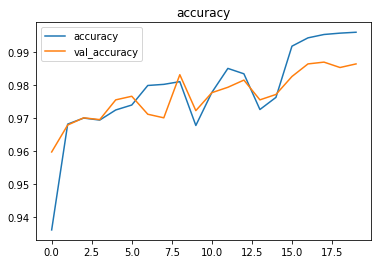

In [40]:
plot(history1.history, history2.history, "accuracy", 'val_accuracy')

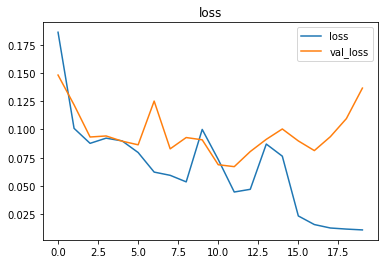

In [41]:
plot(history1.history, history2.history, "loss", 'val_loss')

58/58 [==============================] - 0s 2ms/step


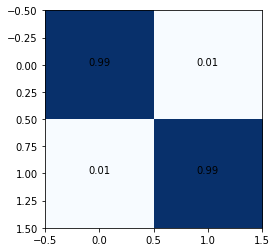

In [42]:
cm = confusion_matrix(ytest, (model.predict(Xtest)>0.5).astype('int'))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)